In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
#Base.classes.keys()
inspector.get_table_names()

['measurement', 'station']

In [10]:
measurement_column= inspector.get_columns("measurement")
for i in measurement_column:
    print(i["name"],i["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
station_column=inspector.get_columns("station")
for i in station_column:
  print(i["name"],i["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station


In [13]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Climate Analysis

('2017-08-23',)
2016-08-23


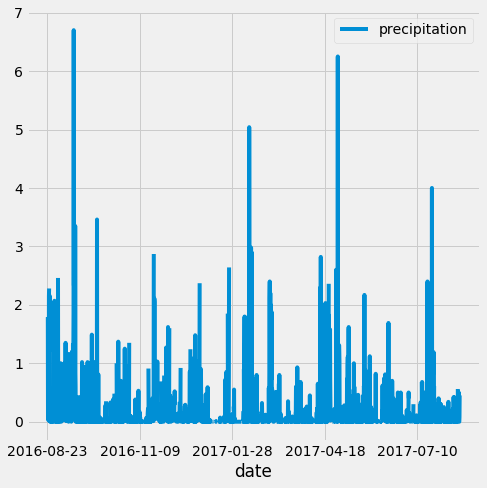

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
precipitation_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
print(precipitation_date)

prev_year = dt.date(2017,8,23) - dt.timedelta(days= 365)
print(prev_year)

# Perform a query to retrieve the date and precipitation scores
precipitation_dt= session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >=prev_year).all()
precipitation_dt

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df=pd.DataFrame(precipitation_dt,columns=["date","precipitation"])
precipitation_df

# Sort the dataframe by date
precipitation_df= precipitation_df.sort_values(["date"],ascending= True)
precipitation_df.set_index(["date"],inplace=True)
precipitation_df


# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(figsize=(7,7))
plt.tight_layout()
plt.show()

#plt.savefig('Images/PrecipitationData.png')

In [120]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# Design a query to show how many stations are available in this dataset?

stations_total=session.query(measurement.station).distinct().count()
stations_total

9

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations=session.query(measurement.station,func.count(measurement.station)).\
                group_by(measurement.station).\
                order_by(func.count(measurement.station).desc()).all()
active_stations

# active_stations = session.query(measurement.station,
#                   func.count(measurement.station)).all()
# active_stations

# active_stations = session.query(measurement.station,
#                   func.count(measurement.station))\
# .group_by(measurement.station).all()
# active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


# highest_temp=session.query(func.max(measurement.tobs)).\
#             filter(measurement.station==active_stations[0][0]).order_by(func.max(measurement.tobs)).all()
# highest_temp

# lowest_temp=session.query(func.min(measurement.tobs)).\
#              filter(measurement.station==active_stations[0][0]).order_by(func.min(measurement.tobs)).all()
# lowest_temp

# average_temp=session.query(func.avg(measurement.tobs)).\
#              filter(measurement.station==active_stations[0][0]).order_by(func.avg(measurement.tobs)).all()
# average_temp

# print(f"The highest temperature of the most active station is {highest_temp},  the lowest temperature is {lowest_temp} 
#      average temperature {average_temp}')
# # i = 0
# # while i < len(active_stations):
# #     print(session.query(measurement.station, measurement.tobs).\
# #     filter(measurement.station == active_stations[i][0]).all())
# #     i += 1

# # temp_data= session.query(measurement.station, measurement.tobs).\
# #     filter(measurement_table.station == active_stations[0][0] ).all()

# # temps = session.query(measurement.tobs).group_by(measurement.station).limit(1).all()
# # temps
# # # lowest_temp=
# # # average_temp=
i = 0
while len(active_stations) > i:
    print(active_stations[i][0])
    print(session.query(func.max(measurement.tobs)).\
    filter(measurement.station == active_stations[i][0]).order_by(func.max(measurement.tobs)).all())
    print(session.query(func.min(measurement.tobs)).\
    filter(measurement.station == active_stations[i][0]).order_by(func.min(measurement.tobs)).all())
    print(session.query(func.avg(measurement.tobs)).\
    filter(measurement.station == active_stations[i][0]).order_by(func.avg(measurement.tobs)).all())
    if active_stations[i][0] == active_stations[0][0]:
        break

USC00519281
[(85.0,)]
[(54.0,)]
[(71.66378066378067,)]


In [124]:
# Choose the station with the highest number of temperature observations.

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram



In [125]:
temp_obs =[]
i = 0
while len(active_stations) > i:
    temp_obs.append(session.query(measurement.station, func.count(measurement.tobs)).\
    filter(measurement.station == active_stations[i][0]).\
                    order_by(func.count(measurement.tobs)).all())
    i+=1
print(temp_obs[0])




[('USC00519281', 2772)]


In [126]:
last_twelve=session.query(measurement.tobs).\
            filter(measurement.date>="2016-08-23").filter(measurement.station=="USC00519281").all()
last_twelve
            
last_twelve
twelve_df=pd.DataFrame(last_twelve, columns= (["tobs"]))
twelve_df.head()


,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


(0, 80)

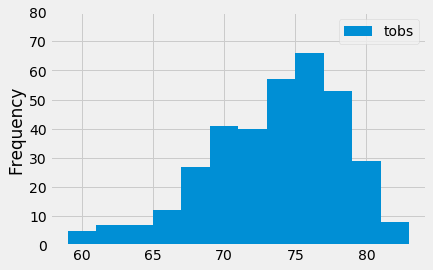

In [127]:
bins = 12
twelve_df.plot.hist(last_twelve,bins)
plt.ylim(0,80)

(array([ 5.,  7.,  7., 12., 27., 41., 18., 40., 72., 64., 40., 15.,  4.]),
 array([59.        , 60.84615385, 62.69230769, 64.53846154, 66.38461538,
        68.23076923, 70.07692308, 71.92307692, 73.76923077, 75.61538462,
        77.46153846, 79.30769231, 81.15384615, 83.        ]),
 <a list of 13 Patch objects>)

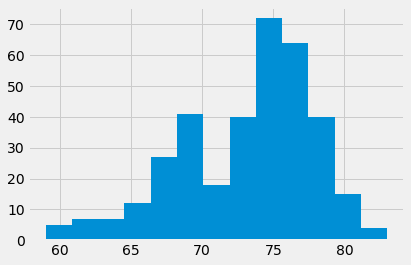

In [128]:
n_bins = 13
x = twelve_df['tobs']
fig, ax = plt.subplots()
ax.hist(x, bins=n_bins)

(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 53., 29.,  8.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <a list of 12 Patch objects>)

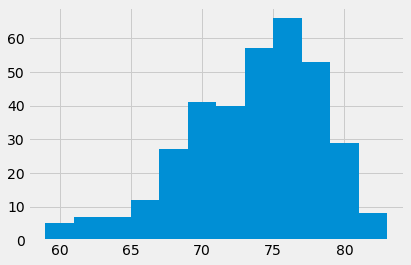

In [130]:
n_bins = 12
x = twelve_df['tobs']
fig, ax = plt.subplots()
ax.hist(x, bins=n_bins)

## Bonus Challenge Assignment

In [131]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [132]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [133]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
